# Clustering con Python

### Importar el dataset

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [100]:
df = pd.read_csv("../datasets/wine/winequality-red.csv",sep=";")
df.shape

(1599, 12)

In [101]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

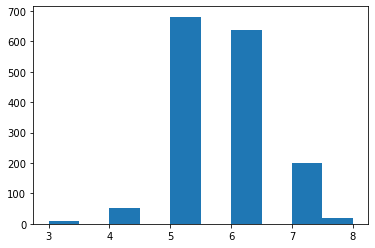

In [102]:
plt.hist(df["quality"])

In [103]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normaliación de los datos

In [104]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [105]:
def dendrogram_tune(*args,**kwargs):        
    max_d = kwargs.pop("max_d", None)
    if (max_d and 'color_threshold' not in kwargs):
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above',0)
    
    ddata = dendrogram(*args,**kwargs)    
    
    if (not kwargs.get('no_plot', False)):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for index, distance, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(index[1:3])
            y = distance[1]
            if (y > annotate_above):
                plt.plot(x,y,'o',c=color)
                plt.annotate("%.3g"%y,(x,y),xytext=(0,-5),
                            textcoords = "offset points", va="top", ha="center")
    
    if (max_d):
        plt.axhline(y=max_d, c='k')
    
    return ddata

In [106]:
Z = linkage(df_norm,"ward")

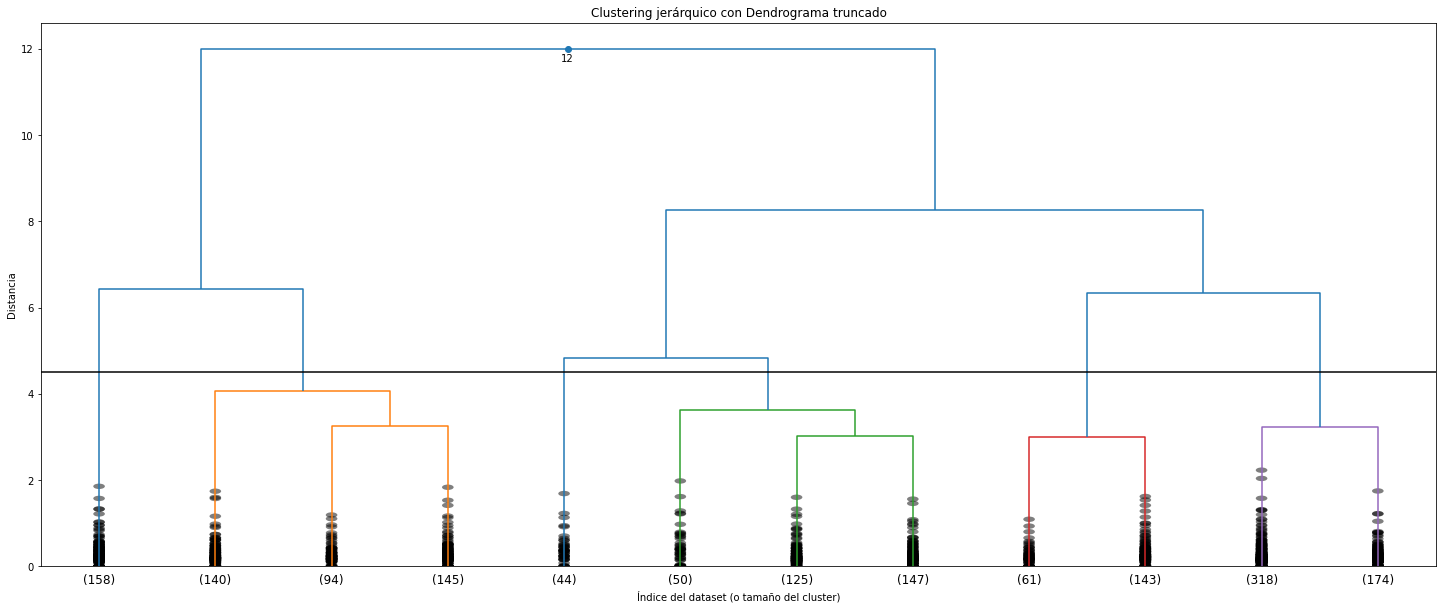

In [107]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram_tune(Z,truncate_mode="lastp",p=12,show_contracted=True,annotate_above=10,max_d=4.5)
plt.show()

[12.00433304  8.26055739  6.43793061  6.32847722  4.83154067  4.05904992
  3.62588068  3.24354076  3.22699811  3.02011464]


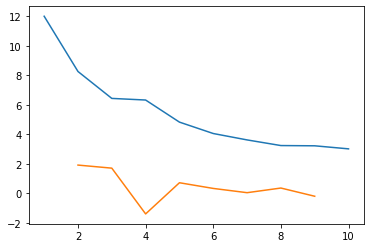

El número óptimo de clusters es 2


In [108]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1,len(last)+1)
plt.plot(idx,last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax()+2
print(f"El número óptimo de clusters es {k}")

In [109]:
clus = AgglomerativeClustering(n_clusters=6,linkage="ward").fit(df_norm)

In [110]:
md_h = pd.Series(clus.labels_)
md_h

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Número de vinos del cluster')

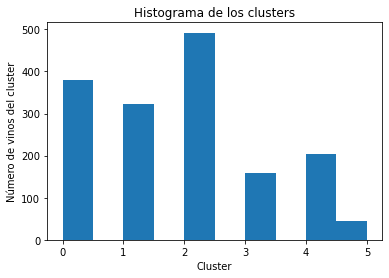

In [111]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [112]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

## K-means

In [113]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [114]:
model.labels_

array([1, 1, 1, ..., 4, 1, 0])

In [115]:
md_k = pd.Series(model.labels_)

In [116]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [117]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,5
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


(array([231.,   0., 365.,   0., 273.,   0., 294.,   0., 217., 219.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

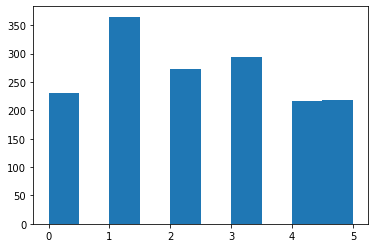

In [118]:
plt.hist(md_k)

In [119]:
model.cluster_centers_

array([[0.36949776, 0.15467295, 0.43337662, 0.10733559, 0.10537042,
        0.16590452, 0.08404081, 0.40418343, 0.41244844, 0.23993571,
        0.50642691, 0.71515152],
       [0.23888956, 0.38491274, 0.06923288, 0.09310377, 0.1207309 ,
        0.166448  , 0.10777869, 0.48021041, 0.52117355, 0.1523747 ,
        0.23563049, 0.42630137],
       [0.32156634, 0.27703347, 0.31106227, 0.16706809, 0.13010084,
        0.40280142, 0.3116789 , 0.54437291, 0.42825416, 0.19409533,
        0.218578  , 0.45567766],
       [0.33206911, 0.27764188, 0.27928571, 0.08724723, 0.13781473,
        0.13691674, 0.1255739 , 0.51968394, 0.41480529, 0.18854128,
        0.20944532, 0.48435374],
       [0.17572693, 0.31794079, 0.09626728, 0.09364939, 0.0953894 ,
        0.24923736, 0.12429369, 0.32021898, 0.57687144, 0.18731201,
        0.49722321, 0.61751152],
       [0.59473876, 0.20171076, 0.54789954, 0.13298305, 0.16580907,
        0.14438228, 0.09551931, 0.65897921, 0.31740553, 0.24698548,
        0.29916872,

In [120]:
model.inertia_

188.54775653571934

## Interpretación final

In [121]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.369498,0.154673,0.433377,0.107336,0.105370,0.165905,0.084041,0.404183,0.412448,0.239936,0.506427,0.715152,0.082251
1,0.238890,0.384913,0.069233,0.093104,0.120731,0.166448,0.107779,0.480210,0.521174,0.152375,0.235630,0.426301,2.128767
2,0.321566,0.277033,0.311062,0.167068,0.130101,0.402801,0.311679,0.544373,0.428254,0.194095,0.218578,0.455678,1.047619
3,0.332069,0.277642,0.279286,0.087247,0.137815,0.136917,0.125574,0.519684,0.414805,0.188541,0.209445,0.484354,1.568027
4,0.175727,0.317941,0.096267,0.093649,0.095389,0.249237,0.124294,0.320219,0.576871,0.187312,0.497223,0.617512,3.414747
5,0.594739,0.201711,0.547900,0.132983,0.165809,0.144382,0.095519,0.658979,0.317406,0.246985,0.299169,0.554338,2.429224
